## Final Project

### Health-related Index : Water availability, sanitation

### Datasets:
- Rwanda
- Nepal
- Haiti
- Nigeria

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import savReaderWriter
import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

/Users/Mel/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Issues with savReader
Issue due to local variable path [here]('https://bitbucket.org/fomcl/savreaderwriter/issues/16/dylibs-on-os-x-ibm-problem)

### Health/water attributes

`RWHR61FL.DCF` describes the attributes and the location of each attribute.

- **HV201 : Major source of drinking water for members of the household. **
 Individual codes are country- specific, but the major categories are standard.
 
 Name=HV201_VS1
- PIPED WATER
- Piped into dwelling
- Piped to yard/plot
- Public tap/standpipe
- TUBE WELL WATER
- Tube well or borehole
- DUG WELL (OPEN/PROTECTED)
- Protected well
- Unprotected well
- SURFACE WATER
- Protected spring
- Unprotected spring
- River/dam/lake/ponds/stream/canal/irrigation channel
- Stone tap/dhara
- Rainwater
- Tanker truck
- Cart with small tank
- Bottled water
- Other
- Missing
Name=MISSING,Special

- **HV202 : Major source of water for household use other than for drinking.  **


- **HV204 : Time taken to get to the water source for drinking water. **

BASE: All respondents except those with drinking water either piped to, or available from a well in, the residence, yard or plot or who use rainwater or bottled water (HV201 <> 11 & HV201 <> 21 & HV201 <> 41 & HV201 <> 61). The actual selection criteria are country- specific.



# 1. Rwanda

In [3]:
# Read mode opens a file for reading only.  
DataFileIn = open('DHS_data/Rwanda-2010/RWHR61FL.dat', 'r')  
# Read all the lines into a list.  
DataList = DataFileIn.readlines()  
DataFileIn.close()

In [9]:
# Get all education attributes 
list_attributes=[] 
  
for item in DataList:
    dict_item={}
    dict_item['HHID'] = item[1:12] # ID 
    dict_item['HV001'] = item[16:23] # Cluster number
    dict_item['HV002'] = item[24:27] # Household number
    dict_item['HV005'] = item[35:42] # household sample weight
    dict_item['HV201'] = item[116:119] # water 
    dict_item['HV202'] = item[118:121] # water 
    dict_item['HV204'] = item[120:124] # water 
    dict_item['HV205'] = item[123:126] # toilet 
    dict_item['HV270'] = item[230] # wealth index 
    dict_item['HV271'] = item[231:238] # wealth index factor score (5 decimals)
    list_attributes.append(dict_item)

In [12]:
df_rwanda2010 = pd.DataFrame(columns=['HHID','HV001','HV002','HV005', 'HV201', 'HV202', 'HV204', 'HV205', 'HV270', 'HV271'])

for i in range(len(DataList)):
    item = DataList[i]
    df_rwanda2010.loc[i] = pd.Series({'HHID':item[1:12], 'HV001':item[16:23], 'HV002':item[24:27], 'HV005':item[35:42], 
                                 'HV201':item[116:119], 'HV202':item[118:121], 'HV204':item[120:124],
                                     'HV205': item[123:126],
                                     'HV270': item[230],'HV271': item[231:238]})

In [13]:
df_rwanda2010.head()

,HHID,HV001,HV002,HV005,HV201,HV202,HV204,HV205,HV270,HV271
0,12115,121,15,737365,2,99,9622,211,,307037
1,12119,121,19,737365,3,,522,211,,148863
2,12121,121,21,737365,3,1,1522,201,,193735
3,12116,121,16,737365,3,1,1522,200,,14170
4,121 3,121,3,737365,3,99,9922,200,,-7971


In [8]:
df_rwanda2010['HV201'].value_counts()

1     5438
3     4284
2     2649
6      163
9        6
Name: HV201, dtype: int64

In [14]:
df_rwanda2010['HV204'].value_counts()

3022    1593
2022    1431
6022    1379
1022    1220
1522     626
3023     602
9622     594
4022     578
6023     481
2023     470
 522     420
1023     375
4023     253
9022     233
1523     164
5022     139
2522     123
4522     121
9611      86
8022      86
 523      77
 822      66
9023      64
5023      57
 622      56
4523      50
2021      49
 322      46
 422      40
3031      39
        ... 
 923       1
 314       1
0141       1
 313       1
6822       1
 621       1
1722       1
3596       1
1513       1
2513       1
 321       1
 296       1
 599       1
4596       1
 641       1
3015       1
1542       1
3012       1
4622       1
1541       1
3223       1
2013       1
9096       1
4222       1
8013       1
6123       1
2122       1
0023       1
3521       1
9696       1
Name: HV204, dtype: int64

In [97]:
attributes_wealth= ['HV106','HV107','HV108','HV109']
df_rwanda2010[attributes_wealth] = df_rwanda2010[attributes_wealth].replace(r'\s+', np.nan, regex=True)

In [23]:
df_rwanda2010.head()

,HHID,HV001,HV002,HV005,HV201,HV202,HV204,HV205,HV270,HV271,HV04,time_water_source_min,time_water_source_hours
0,12115,121,15,737365,2,99,9622,211,,307037,9622,9622,160.366667
1,12119,121,19,737365,3,,522,211,,148863,522,522,8.700000
2,12121,121,21,737365,3,1,1522,201,,193735,1522,1522,25.366667
3,12116,121,16,737365,3,1,1522,200,,14170,1522,1522,25.366667
4,121 3,121,3,737365,3,99,9922,200,,-7971,9922,9922,165.366667


In [20]:
df_rwanda2010.dtypes

HHID     object
HV001    object
HV002    object
HV005    object
HV201    object
HV202    object
HV204    object
HV205    object
HV270    object
HV271    object
dtype: object

In [21]:
df_rwanda2010['HV04'] = pd.to_numeric(df_rwanda2010['HV204'])
#df_rwanda2010[['HV106', 'HV271']].convert_objects(convert_numeric=True)

In [22]:
df_rwanda2010['time_water_source_min'] = df_rwanda2010['HV04']
df_rwanda2010['time_water_source_hours'] = df_rwanda2010['HV04']/float(60)

In [15]:
df_rwanda2010.isnull().sum()

HHID     0
HV001    0
HV002    0
HV005    0
HV201    0
HV202    0
HV204    0
HV205    0
HV270    0
HV271    0
dtype: int64

In [27]:
df_rwanda2010_clean = df_rwanda2010[['HHID', 'HV001', 'HV002', 'HV005', 'HV201', 'HV204', 'HV205']]

In [28]:
df_rwanda2010_clean.head()

,HHID,HV001,HV002,HV005,HV201,HV204,HV205
0,12115,121,15,737365,2,9622,211
1,12119,121,19,737365,3,522,211
2,12121,121,21,737365,3,1522,201
3,12116,121,16,737365,3,1522,200
4,121 3,121,3,737365,3,9922,200


In [148]:
# Number of unique clusters
len(df_rwanda2010['HV001'].unique())

492

In [29]:
# Save as a .csv file
df_rwanda2010.to_csv('datasets-water/rwanda2010_water.csv', header=True)

### Rwanda : Distribution of HV204 : Time to get to water source

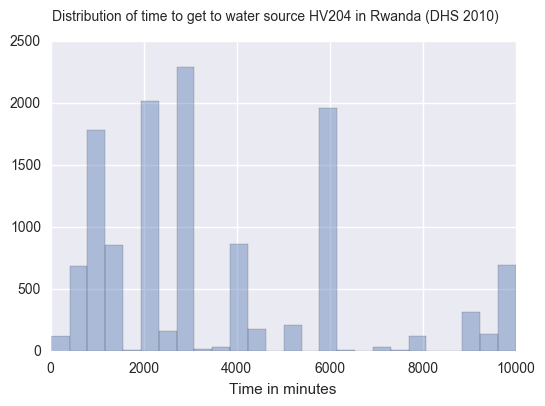

In [40]:
x = df_rwanda2010[['HV204']].dropna(axis=0).astype(str).astype(int)
sns_plot = sns.distplot(x, kde=False, axlabel='Time in minutes');
fig = sns_plot.get_figure()
fig.suptitle('Distribution of time to get to water source HV204 in Rwanda (DHS 2010)')
fig.savefig('plots-water/dist_rwanda2010_HV204.png') 

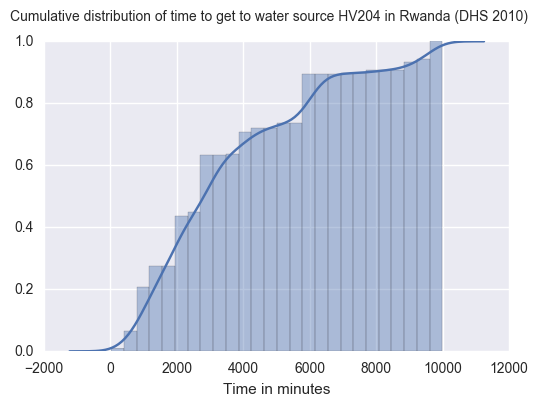

In [19]:
# Cumulative distribution
x = df_rwanda2010[['HV204']].dropna(axis=0).astype(str).astype(int)
sns_plot = sns.distplot(x, hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True), axlabel='Time in minutes');
fig = sns_plot.get_figure()
fig.suptitle('Cumulative distribution of time to get to water source HV204 in Rwanda (DHS 2010)')
fig.savefig('plots-water/cumul_dist_rwanda2010_HV204.png') 

# 2. Nepal

In [31]:
# Read mode opens a file for reading only.  
DataFileIn = open('DHS_data/Nepal-2011/NP_2011_DHS_04032017_1945_104303/nphr60fl/NPHR60FL.dat', 'r')  
# Read all the lines into a list.  
DataList = DataFileIn.readlines()  
DataFileIn.close()

In [32]:
df_nepal2011 = pd.DataFrame(columns=['HHID','HV001','HV002','HV005', 'HV201', 'HV202', 'HV204', 'HV205'])

for i in range(len(DataList)):
    item = DataList[i]
    df_nepal2011.loc[i] = pd.Series({'HHID':item[1:12], 'HV001':item[16:23], 'HV002':item[24:27], 'HV005':item[35:42], 
                                 'HV201':item[116:119], 'HV202':item[118:121], 'HV204':item[120:124],
                                     'HV205': item[123:126]})  

In [33]:
df_nepal2011.head()

,HHID,HV001,HV002,HV005,HV201,HV202,HV204,HV205
0,101 12,101,12,346129,2,99,9613,311
1,101 13,101,13,346129,2,99,9613,311
2,101 14,101,14,346129,2,99,9622,210
3,101 15,101,15,346129,2,99,9613,311
4,101 16,101,16,346129,2,99,9614,411


In [34]:
df_nepal2011.dtypes

HHID     object
HV001    object
HV002    object
HV005    object
HV201    object
HV202    object
HV204    object
HV205    object
dtype: object

In [35]:
df_nepal2011.isnull().sum()

HHID     0
HV001    0
HV002    0
HV005    0
HV201    0
HV202    0
HV204    0
HV205    0
dtype: int64

In [124]:
# Replace empty cells with NaN
attributes= ['HV106']
df_nepal2011[attributes] = df_nepal2011[attributes].replace(r'\s+', np.nan, regex=True)

In [149]:
# Number of unique clusters
len(df_nepal2011['HV001'].unique())

289

In [36]:
df_nepal2011['HV04'] = pd.to_numeric(df_rwanda2010['HV204'])
df_nepal2011['time_water_source_min'] = df_rwanda2010['HV04']
df_nepal2011['time_water_source_hours'] = df_rwanda2010['HV04']/float(60)

In [37]:
df_nepal2011_clean = df_nepal2011[['HHID', 'HV001', 'HV002', 'HV005', 'HV201', 'HV204', 'HV205']]
df_nepal2011_clean.head()

,HHID,HV001,HV002,HV005,HV201,HV204,HV205
0,101 12,101,12,346129,2,9613,311
1,101 13,101,13,346129,2,9613,311
2,101 14,101,14,346129,2,9622,210
3,101 15,101,15,346129,2,9613,311
4,101 16,101,16,346129,2,9614,411


In [38]:
# Save as a .csv file
df_nepal2011_clean.to_csv('datasets-water/nepal2011_water.csv', header=True)

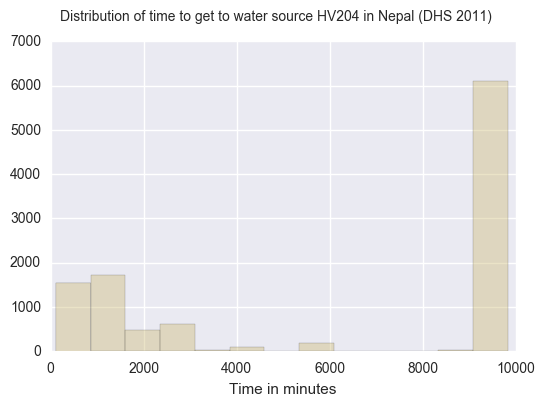

In [39]:
x = df_nepal2011[['HV204']].dropna(axis=0).astype(str).astype(int)
sns_plot = sns.distplot(x, kde=False, axlabel='Time in minutes', color='y');
fig = sns_plot.get_figure()
fig.suptitle('Distribution of time to get to water source HV204 in Nepal (DHS 2011)')
fig.savefig('plots-water/dist_nepal2011_HV204.png') 

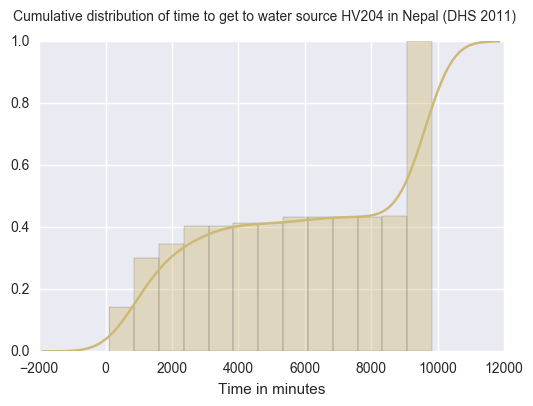

In [41]:
# Cumulative distribution
x = df_nepal2011[['HV204']].dropna(axis=0).astype(str).astype(int)
sns_plot = sns.distplot(x, hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True), axlabel='Time in minutes', color='y');
fig = sns_plot.get_figure()
fig.suptitle('Cumulative distribution of time to get to water source HV204 in Nepal (DHS 2011)')
fig.savefig('plots-water/cumul_dist_nepal2011_HV204.png') 

# 6. Haiti 2012

In [42]:
# Read mode opens a file for reading only.  
DataFileIn = open('DHS_data/Haiti-2012/HT_2012_DHS_04032017_2011_104303/hthr61fl/hthr61fl.dat', 'r')  
# Read all the lines into a list.  
DataList = DataFileIn.readlines()  
DataFileIn.close()

In [43]:
df_haiti2012 = pd.DataFrame(columns=['HHID','HV001','HV002','HV005', 'HV201', 'HV202', 'HV204', 'HV205'])

for i in range(len(DataList)):
    item = DataList[i]
    df_haiti2012.loc[i] = pd.Series({'HHID':item[1:12], 'HV001':item[16:23], 'HV002':item[24:27], 'HV005':item[35:42], 
                                 'HV201':item[116:119], 'HV202':item[118:121], 'HV204':item[120:124],
                                     'HV205': item[123:126]})   

In [45]:
df_haiti2012.head()

,HHID,HV001,HV002,HV005,HV201,HV202,HV204,HV205
0,1 1,1,1,1956277,2,1,1022,211
1,1 2,1,2,1956277,1,3,3012,211
2,1 3,1,3,1956277,3,1,1012,210
3,1 4,1,4,1956277,2,1,1012,211
4,1 5,1,5,1956277,2,99,9812,211


In [47]:
df_haiti2012.dtypes

HHID     object
HV001    object
HV002    object
HV005    object
HV201    object
HV202    object
HV204    object
HV205    object
dtype: object

In [48]:
df_haiti2012.isnull().sum()

HHID     0
HV001    0
HV002    0
HV005    0
HV201    0
HV202    0
HV204    0
HV205    0
dtype: int64

In [50]:
# Number of unique clusters
len(df_haiti['HV001'].unique())

445

In [49]:
df_haiti2012['HV04'] = pd.to_numeric(df_rwanda2010['HV204'])
df_haiti2012['time_water_source_min'] = df_rwanda2010['HV04']
df_haiti2012['time_water_source_hours'] = df_rwanda2010['HV04']/float(60)

In [50]:
# Save as a .csv file
df_haiti2012_clean = df_haiti2012[['HHID', 'HV001', 'HV002', 'HV005', 'HV201', 'HV204', 'HV205']]
df_haiti2012_clean.head()
df_haiti2012_clean.to_csv('datasets-water/haiti2012_water.csv', header=True)

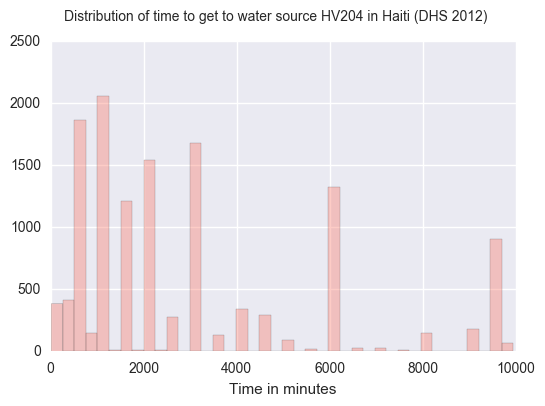

In [51]:
x = df_haiti2012[['HV204']].dropna(axis=0).astype(str).astype(int)
sns_plot = sns.distplot(x, kde=False, axlabel='Time in minutes', color='#FA8072');
fig = sns_plot.get_figure()
fig.suptitle('Distribution of time to get to water source HV204 in Haiti (DHS 2012)')
fig.savefig('plots-water/dist_haiti2012_HV204.png') 

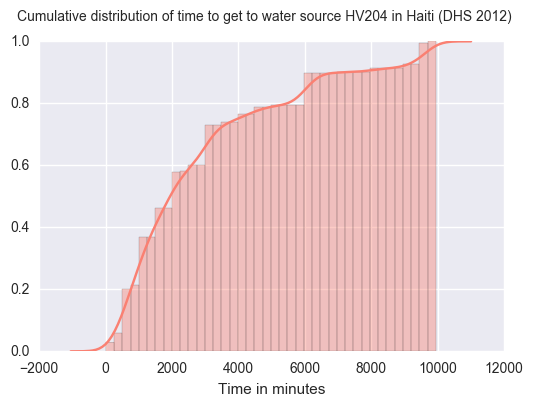

In [52]:
# Cumulative distribution
x = df_haiti2012[['HV204']].dropna(axis=0).astype(str).astype(int)
sns_plot = sns.distplot(x, hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True), axlabel='Time in minutes', 
                        color='#FA8072');
fig = sns_plot.get_figure()
fig.suptitle('Cumulative distribution of time to get to water source HV204 in Haiti (DHS 2012)')
fig.savefig('plots-water/cumul_dist_haiti2012_HV204.png') 